In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import wave
import sys

Using CNN for producing the echo in speech


In [ ]:
from scipy.io.wavfile import write

In [ ]:
spf = wave.open('/content/helloworld.wav', 'r')

In [ ]:
signal = spf.readframes(-1)
signal = np.fromstring(signal, 'Int16')
print("numpy signal:", signal.shape)

numpy signal: (18432,)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  


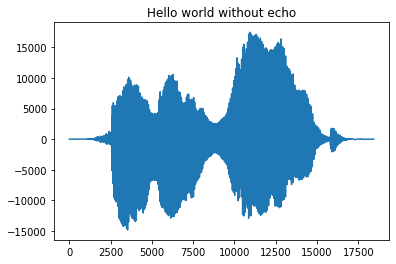

In [ ]:
plt.plot(signal)
plt.title("Hello world without echo")
plt.show()

In [ ]:
delta = np.array([1., 0., 0.])
noecho = np.convolve(signal, delta)
print("noecho signal:", noecho.shape)
assert(np.abs(noecho[:len(signal)] - signal).sum() < 0.000001)


noecho signal: (18434,)


In [ ]:
noecho = noecho.astype(np.int16) # make sure you do this, otherwise, you will get VERY LOUD NOISE
write('noecho.wav', 16000, noecho)

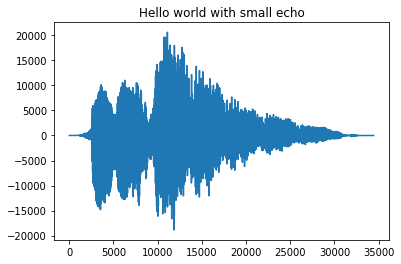

In [ ]:
filt = np.zeros(16000)
filt[0] = 1
filt[4000] = 0.6
filt[8000] = 0.3
filt[12000] = 0.2
filt[15999] = 0.1
out = np.convolve(signal, filt)

out = out.astype(np.int16) # make sure you do this, otherwise, you will get VERY LOUD NOISE
write('out.wav', 16000, out)

plt.plot(out)
plt.title("Hello world with small echo")
plt.show()

using CNN for producing Bluring effect in image

In [ ]:
import numpy as np
from scipy.signal import convolve2d
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
img = mpimg.imread('/content/lena.png')

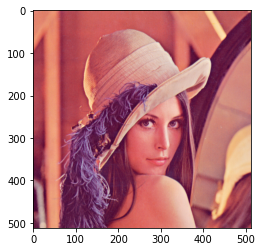

In [ ]:
plt.imshow(img)
plt.show()

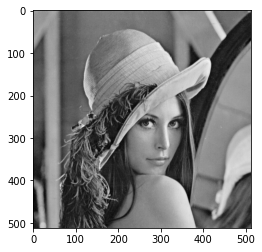

In [ ]:
bw = img.mean(axis=2)
plt.imshow(bw, cmap='gray')
plt.show()


Creating the Gaussian filter

In [ ]:
W = np.zeros((20, 20))
for i in range(20):
    for j in range(20):
        dist = (i - 9.5)**2 + (j - 9.5)**2
        W[i, j] = np.exp(-dist / 50.)
W /= W.sum()

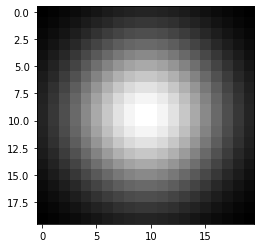

In [ ]:
plt.imshow(W, cmap='gray')
plt.show()

Output will not give proper outcome in dimension(dimensions will change)

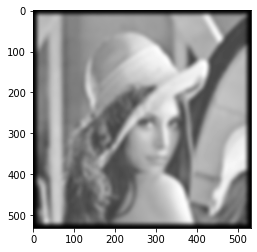

In [ ]:
out = convolve2d(bw, W)
plt.imshow(out, cmap='gray')
plt.show()

In [ ]:
print(out.shape)

(531, 531)


We can also have output with same dimensions

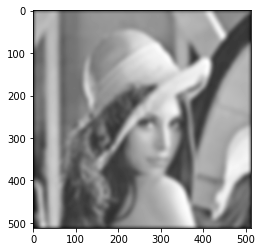

(512, 512)


In [ ]:
out = convolve2d(bw, W, mode='same')
plt.imshow(out, cmap='gray')
plt.show()
print(out.shape)

Now let us try with colour image

(512, 512, 3)


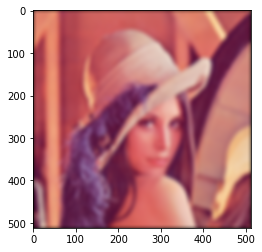

In [ ]:
out3 = np.zeros(img.shape)
print(out3.shape)
for i in range(3):
    out3[:,:,i] = convolve2d(img[:,:,i], W, mode='same')
# out3 /= out3.max() # can also do this if you didn't normalize the kernel
plt.imshow(out3)
plt.show()

Let us try to do edge detection with Convolution Operation

In [ ]:
import numpy as np
from scipy.signal import convolve2d
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


In [ ]:
img = mpimg.imread('lena.png')

In [ ]:
bw = img.mean(axis=2)

Taking Gradients in both the direction

In [ ]:
Hx = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1],
], dtype=np.float32)

Hy = np.array([
    [-1, -2, -1],
    [0, 0, 0],
    [1, 2, 1],
], dtype=np.float32)

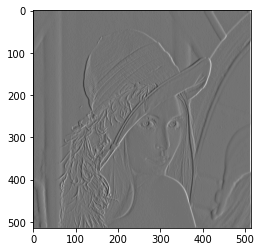

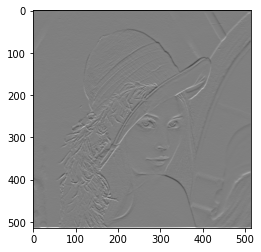

In [ ]:
Gx = convolve2d(bw, Hx)
plt.imshow(Gx, cmap='gray')
plt.show()

Gy = convolve2d(bw, Hy)
plt.imshow(Gy, cmap='gray')
plt.show()

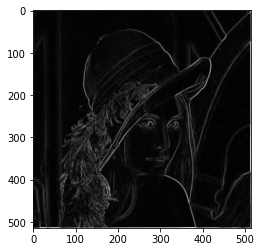

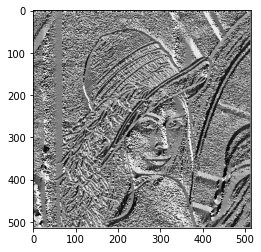

In [ ]:

# Gradient magnitude
G = np.sqrt(Gx*Gx + Gy*Gy)
plt.imshow(G, cmap='gray')
plt.show()

# The gradient's direction
theta = np.arctan2(Gy, Gx)
plt.imshow(theta, cmap='gray')
plt.show()


Implementing Blur from scratch

In [ ]:
import numpy as np
# from scipy.signal import convolve2d
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from datetime import datetime


In [ ]:
def convolve2d(X, W):
    n1, n2 = X.shape
    m1, m2 = W.shape
    Y = np.zeros((n1 + m1 - 1, n2 + m2 - 1))
    for i in range(n1):
        for j in range(n2):
            Y[i:i+m1,j:j+m2] += X[i,j]*W
    ret = Y[m1//2:-m1//2+1,m2//2:-m2//2+1]
    assert(ret.shape == X.shape)
    return ret

In [ ]:
img = mpimg.imread('lena.png')

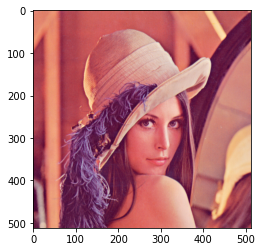

In [ ]:
plt.imshow(img)
plt.show()

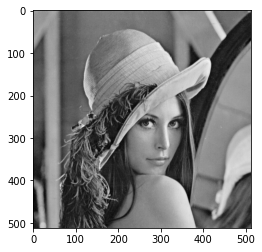

In [ ]:
bw = img.mean(axis=2)
plt.imshow(bw, cmap='gray')
plt.show()

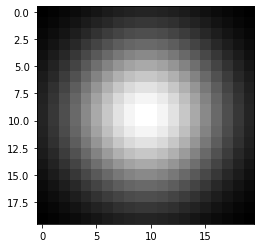

In [ ]:
# create a Gaussian filter
W = np.zeros((20, 20))
for i in range(20):
    for j in range(20):
        dist = (i - 9.5)**2 + (j - 9.5)**2
        W[i, j] = np.exp(-dist / 50.)

plt.imshow(W, cmap='gray')
plt.show()


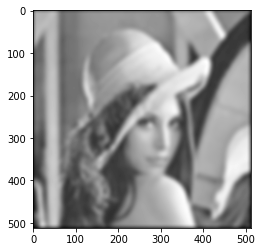

(512, 512)


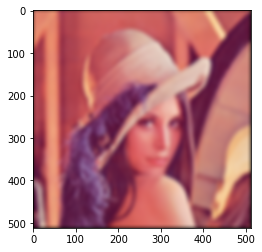

In [ ]:
out = convolve2d(bw, W)
plt.imshow(out, cmap='gray')
plt.show()

# what's that weird black stuff on the edges? let's check the size of output
print(out.shape)
# after convolution, the output signal is N1 + N2 - 1

# try it in color
out = np.zeros(img.shape)
W /= W.sum()
for i in range(3):
    out[:,:,i] = convolve2d(img[:,:,i], W)
plt.imshow(out)
plt.show()